In [69]:
%pylab inline
import numpy as np
import tracpy.tools
import tracpy
import xarray
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [70]:
proj = tracpy.tools.make_proj('nwgom-pyproj')
loc = "http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

In [71]:
d = xarray.open_dataset(loc)

In [73]:
start_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 4348 + (i*8760) + leap*24
    start_time.append( time )

start_time = np.array(start_time)

end_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 744 + 4348 + (i*8760) + leap*24
    end_time.append( time )
    
end_time = np.array(end_time)

In [78]:
atch_bins = np.linspace(0,0.5,300)
atch_hist = np.zeros(len(atch_bins)-1)

temp_hist = np.zeros(len(atch_bins)-1)

# for yind in range(24):
yind = 22
print( yind )
atch_dye = d["dye_03"][ start_time[yind]-720 : end_time[yind]-720, :, 27:35, 301:310]
for time in range(744):
    temp_hist += np.histogram( atch_dye[time, :, :, :], atch_bins,  )[0]
    atch_hist = temp_hist

22


In [79]:
np.savez("atch_June2015", hist = atch_hist, bins = atch_bins)

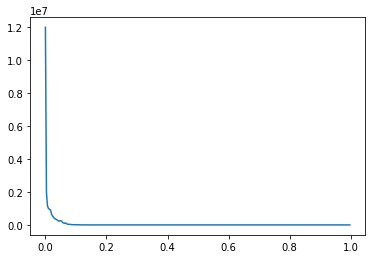

In [23]:
plt.plot( atch_bins[0:-1], atch_hist)

In [3]:
def func(x, a, b, c, d ):
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

    return y

In [117]:
# width = 0.8
# fig = plt.figure(figsize=(20,10),dpi=600)
# fig.tight_layout()   

# # all
# ax = fig.add_subplot(111)
# atchall = np.load("atch_all.npz")

# ax.bar( atchall["bins"][0:-1], atchall["hist"], alpha=0.3, width=0.002, color="purple")

# popt, pcov = curve_fit(func, atchall["bins"][20:39], atchall["hist"][20:39], 
#                        bounds=([375000-50000, 0.02, 0.0001, 1e-8],
#                                [375000+50000, 0.06, 0.013, 1e-3]))
# xdata = np.linspace(0, 0.1, 300 )
# pltall = ax.plot( xdata, func( xdata, *popt), color="purple", linewidth=5 )

# ax.set_ylim(0,400000)
# ax.set_xlim(0,0.1)

# ax.set_xticks( [0, 0.05, 0.1, 0.1] )
# ax.set_xticklabels( [0, 0.05, 0.1, 0.1], fontsize=60 )
# ax.set_xlabel( "Dye concentration", fontsize=60)

# ax.set_yticks( [50000, 200000, 350000] )
# ax.set_yticklabels( ['', '', ''], fontsize=24 )
# # ax.set_ylabel( "Counts 1993-2016", fontsize=24)

# # 2016
# ax2 = ax.twinx()
# atch16 = np.load("atch_2016.npz")

# ax2.bar( atch16["bins"][0:-1], atch16["hist"][0:], alpha=0.3, width=0.002, color="black")

# atch15 = np.load("atch_June2015.npz")

# ax2.bar( atch15["bins"][0:-1], atch15["hist"][0:], alpha=0.3, width=0.002, color="orange")
# # popt, pcov = curve_fit(func, atch16["bins"][20:-1], atch16["hist"][20:])
# # xdata = np.linspace(0, 0.1, 300 )
# # plt16 = ax2.plot( xdata, func( xdata, *popt), color="black", linewidth=5 )

# ax2.set_ylim(0,75000)
# # ax2.set_yticks( [5000, 37500, 70000] )
# # ax2.set_yticklabels( ['', '', ''], fontsize=24 )
# # ax2.set_ylabel( "Counts 2016", fontsize=24)

# # ax.set_title( "Atchafalaya River dye concentration over East Bank in July\n", fontsize=35 )

# ax.text( 0.053, 340000, "Atchafalaya", fontsize=80)

# fig.legend( [pltall[0], plt16[0]] , ["All years", "2015"], loc=(0.55,0.5), fontsize=60 )

# # fig.savefig( "figures/atchdye.png")

In [38]:
popt

array([3.45944368e+05, 3.73053859e-02, 1.50000000e-02, 1.00000000e-03])

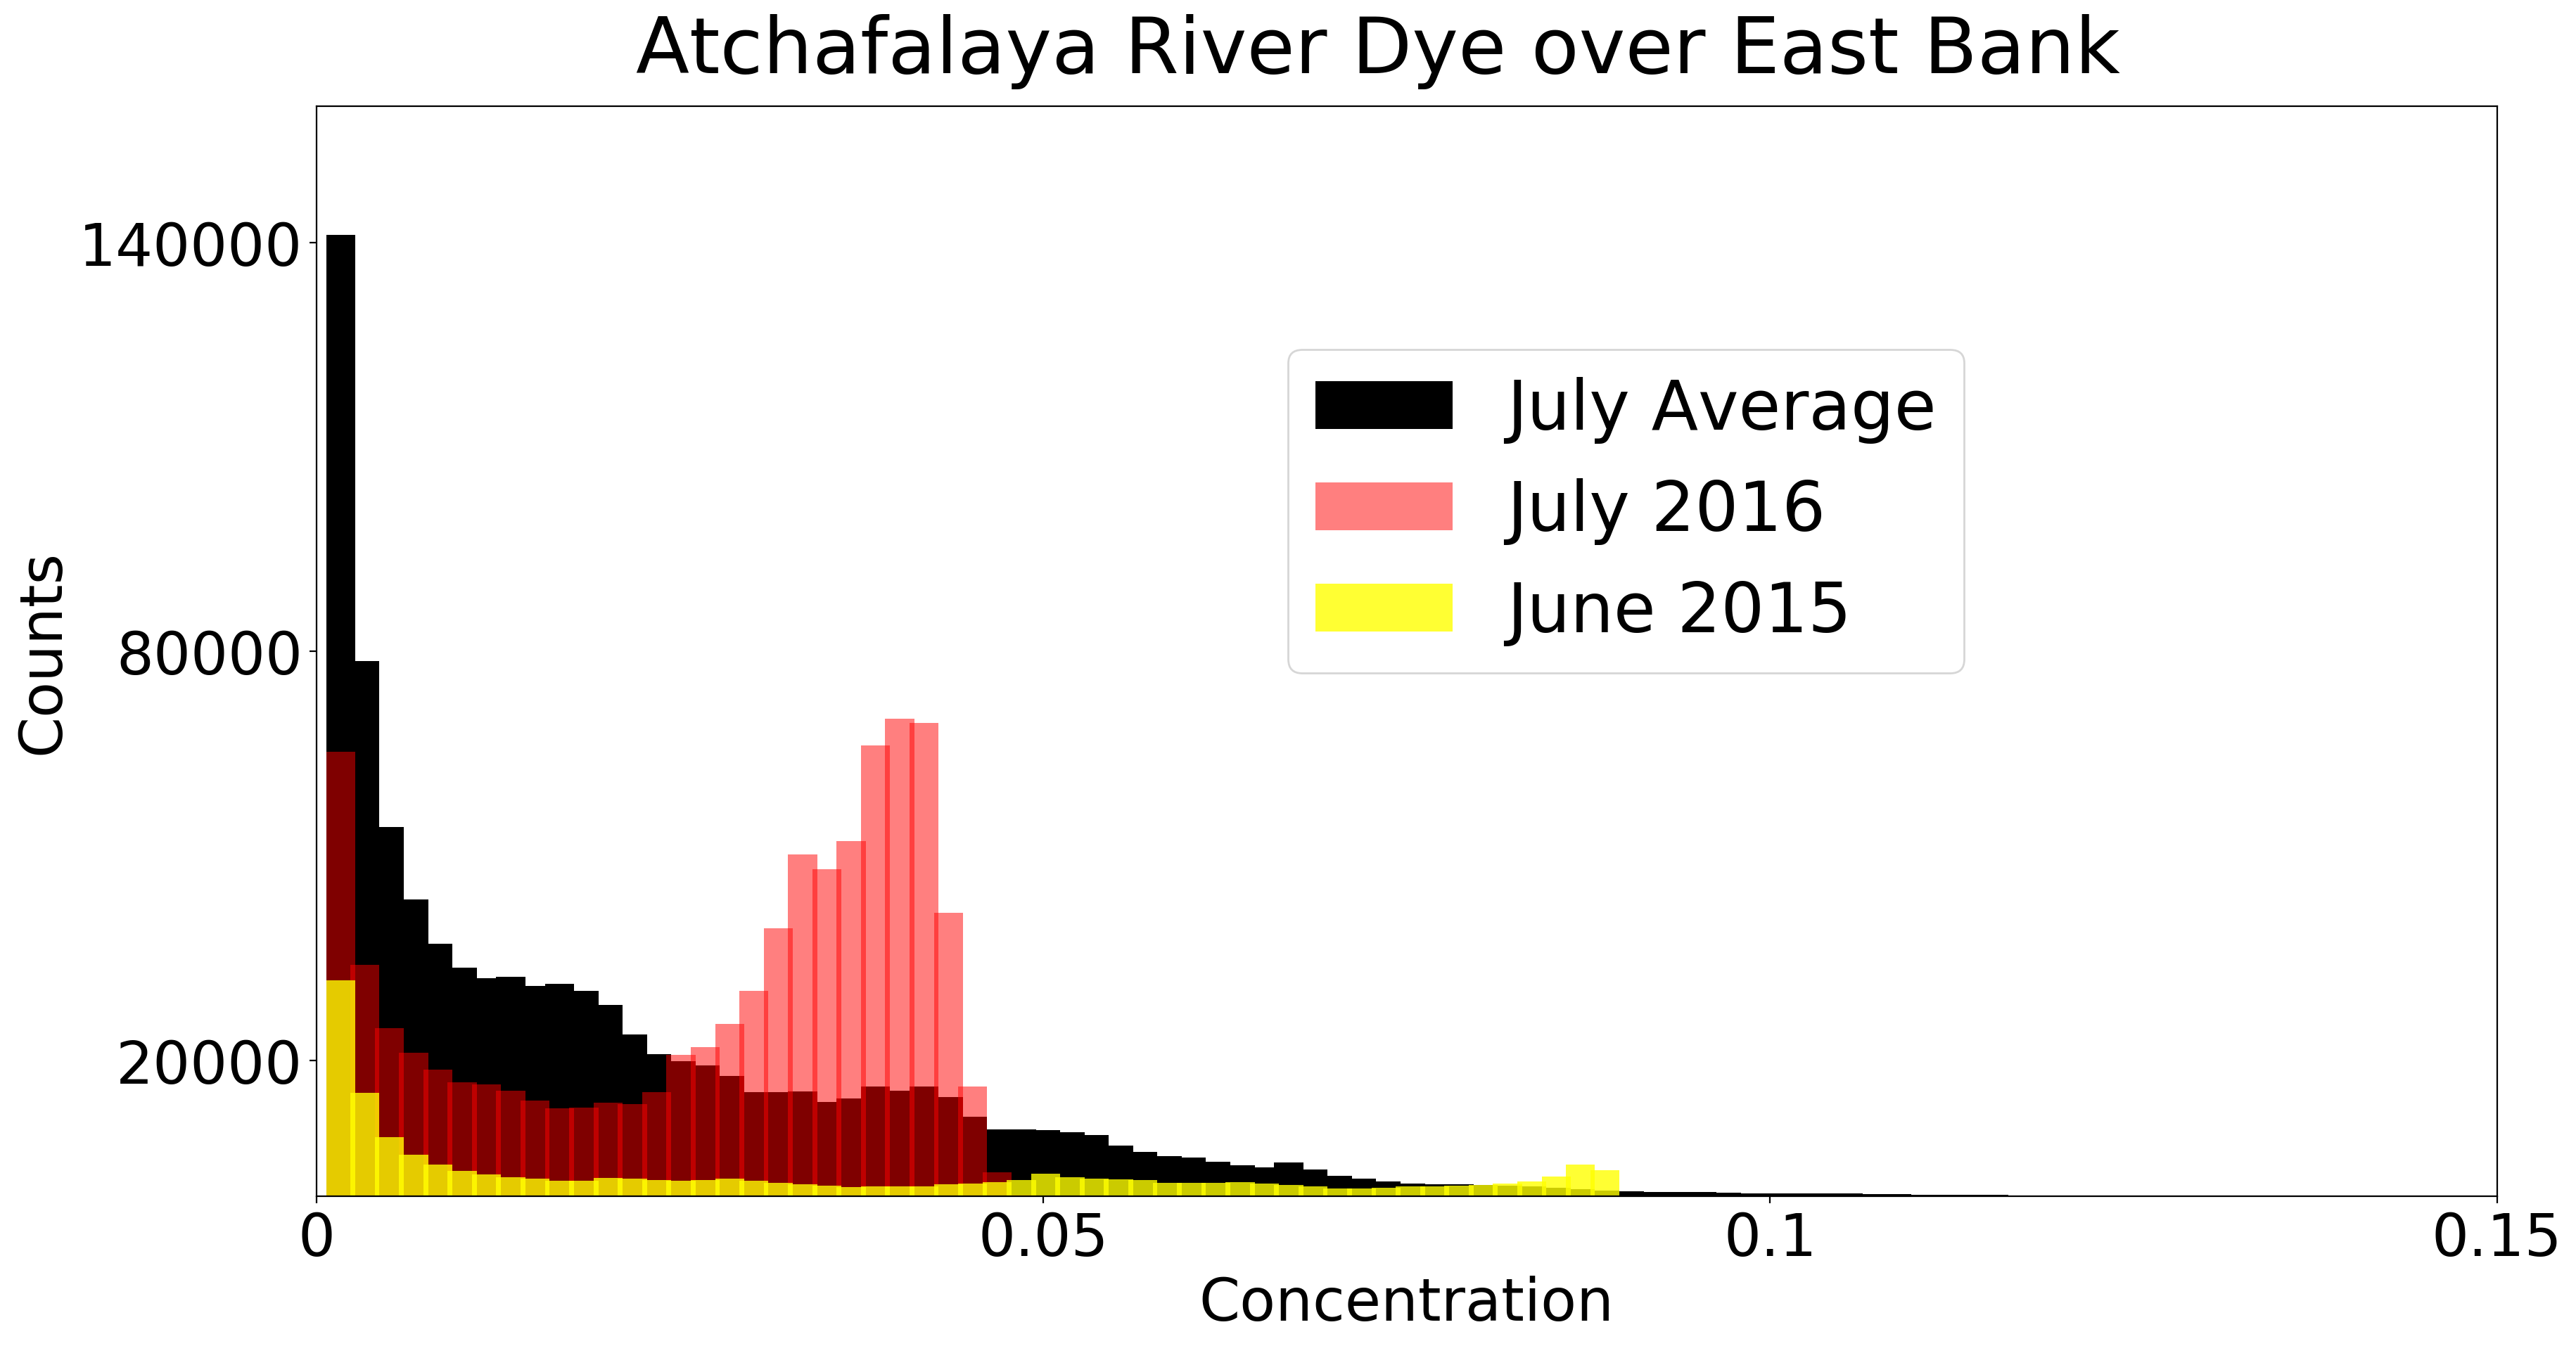

In [109]:
width = 0.8
fig = plt.figure(figsize=(20,10),dpi=200)
fig.tight_layout()   

# all
ax = fig.add_subplot(111)
ax.set_xlim(0,0.15)
ax.set_ylim(0, 160000)

atchall = np.load("atch_all.npz")
_all = ax.bar( atchall["bins"][1:-1], (atchall["hist"][1:]/23.), alpha=1, width=0.002, color="black")

atch16 = np.load("atch_2016.npz")
_16 = ax.bar( atch16["bins"][1:-1], (atch16["hist"][1:]), alpha=0.5, width=0.002, color="red")

atch15 = np.load("atch_June2015.npz")
_15 = ax.bar( atch15["bins"][1:-1], (atch15["hist"][1:]), alpha=0.8, width=0.002, color="yellow")


fig.legend( [_all, _16, _15], ["July Average", "July 2016", "June 2015"], loc=(0.5, 0.5), fontsize=35)

ax.set_xticks( [0, 0.05, 0.1, 0.15] )
ax.set_xticklabels( [0, 0.05, 0.1, 0.15], fontsize=30 )

ax.set_yticks( [20000, 80000, 140000] )
ax.set_yticklabels( [20000, 80000, 140000], fontsize=30 )

fig.subplots_adjust(top=0.9)
ax.text( 0.022, 165000, "Atchafalaya River Dye over East Bank", fontsize=40 )
ax.set_xlabel( "Concentration", fontsize=30 )
ax.set_ylabel( "Counts", fontsize=30 )

fig.savefig("figures/atchhist.png")

In [111]:
grid.dxdy.shape

(191, 671)

In [116]:
(grid.dzt0[:, 27:35, 301:310] * grid.dxdy[27:35, 301:310]).shape

(30, 8, 9)

In [146]:
atch_bins = np.linspace(0,1,300)
atch_hist = np.zeros(len(atch_bins)-1)

temp_hist = np.zeros(len(atch_bins)-1)

# for yind in range(24):
yind = 22
print( yind )
atch_dye = d["dye_03"][ start_time[yind]-720 : end_time[yind]-720, -1, 27:35, 301:310]
for time in range(744):
    temp_hist += np.histogram( (atch_dye[time, -1, :, :]) * (grid.dzt0[-1, 27:35, 301:310] * grid.dxdy[27:35, 301:310])
                              , atch_bins  )[0]
    atch_hist = temp_hist

22


IndexError: too many indices

In [139]:
atch_dye[0]

<xarray.DataArray 'dye_03' (s_rho: 30, eta_rho: 8, xi_rho: 9)>
array([[[7.138547e-05, 6.917555e-05, ..., 2.252872e-05, 3.147975e-05],
        [9.659813e-05, 8.684039e-05, ..., 2.437977e-05, 3.983829e-05],
        ...,
        [1.556951e-04, 1.442573e-04, ..., 1.275731e-04, 1.247265e-04],
        [1.910341e-04, 1.592701e-04, ..., 1.199105e-04, 1.208718e-04]],

       [[7.262135e-05, 4.782395e-05, ..., 1.855896e-05, 5.151262e-05],
        [1.138513e-04, 7.196002e-05, ..., 3.868218e-05, 6.255128e-05],
        ...,
        [1.533251e-04, 1.355571e-04, ..., 1.161655e-04, 1.189970e-04],
        [1.789557e-04, 1.561279e-04, ..., 1.185009e-04, 1.179452e-04]],

       ...,

       [[1.256960e-06, 1.368529e-06, ..., 2.451721e-06, 2.268829e-06],
        [1.693270e-06, 1.936946e-06, ..., 2.801962e-06, 3.420412e-06],
        ...,
        [7.300740e-06, 8.799545e-06, ..., 1.770994e-05, 1.971723e-05],
        [8.427241e-06, 1.042833e-05, ..., 2.040205e-05, 2.279615e-05]],

       [[1.263176e-06, 1.37

In [120]:
# d

<BarContainer object of 299 artists>

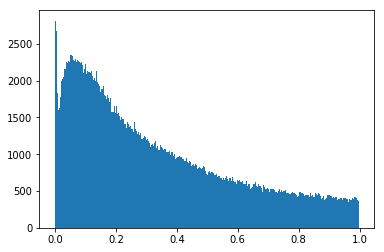

In [135]:
plt.bar( atch_bins[:-1] , atch_hist, width=1./300)

In [130]:
0.5/300

0.0016666666666666668

In [132]:
atch_hist

array([ 876., 1938., 1519., 1156.,  944.,  888.,  821.,  778.,  831.,
        797.,  836.,  942.,  955., 1038., 1004., 1015., 1078.,  974.,
       1064., 1100., 1079., 1074., 1142., 1108., 1152., 1093., 1141.,
       1127., 1146., 1104., 1243., 1107., 1135., 1207., 1180., 1148.,
       1121., 1155., 1176., 1096., 1124., 1164., 1126., 1126., 1146.,
       1132., 1146., 1118., 1085., 1174., 1123., 1121., 1102., 1145.,
       1085., 1128., 1046., 1064., 1058., 1100., 1132., 1089., 1052.,
       1035., 1052., 1078., 1075., 1039., 1046., 1072., 1044., 1058.,
       1028., 1101., 1021., 1040., 1010., 1000., 1017., 1013.,  995.,
       1000., 1041., 1093.,  983., 1002.,  969.,  982.,  932., 1000.,
        872.,  971.,  947.,  939.,  970.,  953.,  956.,  854.,  901.,
        886.,  882.,  866.,  937.,  866.,  868.,  892.,  830.,  873.,
        842.,  924.,  789.,  787.,  787.,  791.,  777.,  797.,  834.,
        823.,  770.,  789.,  876.,  774.,  750.,  799.,  784.,  774.,
        752.,  763.,